<a href="https://colab.research.google.com/github/cchiraag/ML-Projects/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Single Value Decomposition (SVD)**

**SVD** states that every matrix $A$ (with shape $m × n$ and $m ≥ n$), can be decomposed into three different matrices i.e. $U$, $V$ and $Σ$, in the form of:
\begin{align}A = U \Sigma V^T\end{align}

where, 
* $U$ = matrix of shape $m × m$
* $V$ = matrix of shape $n × n$ 
* such that $U$ and $V$ are orthogonal (i.e. $U^TU = I$ and $V^TV = I$)
* $\Sigma$ = diagonal matrix of shape $m × n$



First of all, let us create a matrix $A$ to which we have to perform **SVD**:

In [ ]:
import numpy as np

A = np.array([[-5.4, -19.4, -12.4, 19.6, 17.6], 
              [-4.6, -14.6, -12.6, 14.4, 17.4], 
              [1, -14, -14, 9, 18], 
              [9.6, -10.4, -16.4, 2.6, 14], 
              [13.4, -10.6, -17.6, 1.4, 13.4], 
              [18.6, -11.4, -15.4, -0.4, 8.6], 
              [20.8, -11.2, -14.2, 0.8, 3.8], 
              [20.8, -12.2, -11.2, -0.2, 2.8], 
              [14.6, -7.4, -7.4, 0.6, -0.4]])
print(A)

[[ -5.4 -19.4 -12.4  19.6  17.6]
 [ -4.6 -14.6 -12.6  14.4  17.4]
 [  1.  -14.  -14.    9.   18. ]
 [  9.6 -10.4 -16.4   2.6  14. ]
 [ 13.4 -10.6 -17.6   1.4  13.4]
 [ 18.6 -11.4 -15.4  -0.4   8.6]
 [ 20.8 -11.2 -14.2   0.8   3.8]
 [ 20.8 -12.2 -11.2  -0.2   2.8]
 [ 14.6  -7.4  -7.4   0.6  -0.4]]


In [ ]:
At = np.transpose(A) # np.transpose() used to find the transpose of a given matrix.
print(At)

[[ -5.4  -4.6   1.    9.6  13.4  18.6  20.8  20.8  14.6]
 [-19.4 -14.6 -14.  -10.4 -10.6 -11.4 -11.2 -12.2  -7.4]
 [-12.4 -12.6 -14.  -16.4 -17.6 -15.4 -14.2 -11.2  -7.4]
 [ 19.6  14.4   9.    2.6   1.4  -0.4   0.8  -0.2   0.6]
 [ 17.6  17.4  18.   14.   13.4   8.6   3.8   2.8  -0.4]]


## Transformation: $A.A^T$

1.   First transformation: $A.A^T$
2.   Second transformation: $A^T.A$
3.   Original matrix: A



Here, $A$ matrix is of shape $m * n$, but after transformation, our matrix becomes:--
1. Symmetrical
2. Square
3. Eigenvalues are all positive
4. Both matrices having same eigenvalues
5. Both having same rank. <br><br>
Since, they both are symmetric, hence their eigenvalues are orthonormal to each 
other.



* $A$: The original data matrix
* $A^T$: Transpose of data matrix $A$
* $u_i$: Eigenvectors of $AA^T$ 
* $v_i$: Eigenvectors of $A^TA$ 
* $U$: Left-singular matrix
* $V$: Right-singular matrix

**The square roots of eigenvalues are called singular values.**

We concatenate vectors $u_i$ to create a matrix $U$ and subsequently  $v_i$ to create matrix $V$.

\begin{align}
U = \begin{bmatrix}
        | &  &| \\
        u_1 &{...} &u_m \\
        | &  &| \\
    \end{bmatrix}
V = \begin{bmatrix}
        | &  &| \\
        v_1 &{...} &v_n \\
        | &  &| \\
    \end{bmatrix}
\end{align}
where, 
* $U$: Vectors $u_i$ concatenated to create matrix $U$
* $V$: Vectors $u_i$ concatenated to create matrix $V$.

### To find the value of U:--

In [ ]:
from scipy import linalg

x = linalg.eig(A @ At)        # returns a tuple with first element as array of eigenvalues and, second as array of eigenvectors
xeigval = x[0].real       # returns the eigenvalue of A.At in real number.
U = x[1]    # returns the eigenvector of A.At and assigns to U.
print("U matrix is: --\n")
print(U)

U matrix is: --

[[-3.83276232e-01 -5.30173587e-01  4.79528183e-01  6.82171963e-02
   1.04818110e-01 -5.11910323e-01  8.91965981e-02  2.88891379e-02
   4.90956679e-02]
 [-3.36600118e-01 -4.37627628e-01  4.13925150e-02  2.00717287e-01
  -1.43368237e-01  7.79280395e-01 -5.58569547e-02  2.42107186e-01
   6.53579880e-02]
 [-3.58370645e-01 -2.64285513e-01 -2.32995131e-01 -5.05322498e-01
  -1.72554208e-01 -8.97311412e-02 -1.07634451e-02 -4.39102034e-01
  -1.74917199e-01]
 [-3.49224793e-01  3.33415580e-02 -4.41802138e-01  1.57143636e-01
   8.10584439e-01  3.73321582e-12 -1.07568994e-12  5.18449833e-13
   1.07495841e-12]
 [-3.71804830e-01  1.30245615e-01 -4.40517786e-01  2.26610944e-01
  -4.49574661e-01 -2.58976895e-01 -4.83184917e-01  1.64412612e-01
  -2.95376161e-02]
 [-3.50546722e-01  2.92515468e-01 -1.22389974e-01 -2.02985842e-01
  -1.90414149e-01 -3.45055216e-02  6.80871379e-01 -1.27813939e-01
   5.33205221e-01]
 [-3.24221571e-01  3.64837545e-01  2.27620744e-01  4.51743719e-01
  -1.182058

### To find the value of $V$:--

In [ ]:
y = linalg.eig(At @ A)        # returns a tuple with first element as array of eigenvalues and, second as array of eigenvectors
yeigval = y[0].real       # returns the eigenvalue of At.A in real number.
V = y[1]        # returns the eigenvector of At.A and assigns to U.
print("V matrix is: --\n")
print(V)

V matrix is: --

[[-0.37487508  0.79375517 -0.17184234 -0.44555587 -0.03703491]
 [ 0.51705057  0.11416418  0.48083858 -0.46077222  0.52546025]
 [ 0.56408818 -0.07611804 -0.32786177 -0.43241551 -0.61768443]
 [-0.23645143 -0.46494233 -0.5640829  -0.44966062  0.45556027]
 [-0.46692894 -0.36736079  0.55998357 -0.44720363 -0.36530908]]


### To check whether $U$ and $V$ are orthonormal:--
### $U^TU$ and $V^TV$ $=$ $I$

In [ ]:
Ut = np.transpose(U)
print("Ut.U matrix:--\n")
print(Ut @ U)         # matrix multiplication of Ut and U
print("\n")
Vt = np.transpose(V)
print("Vt.V matrix:--\n")
print(Vt @ V)         # matrix multiplication of Vt and V

Ut.U matrix:--

[[ 1.00000000e+00  6.01454937e-17 -6.69558021e-17  5.53623504e-17
   2.80305523e-17 -1.39513076e-16  3.88570314e-18  2.45897700e-16
  -6.42705315e-17]
 [ 6.01454937e-17  1.00000000e+00  5.80519485e-17 -2.04007655e-16
   3.86931220e-17 -2.17336959e-16  1.33524933e-16  5.43818053e-17
  -2.86909045e-16]
 [-6.69558021e-17  5.80519485e-17  1.00000000e+00  6.59998068e-18
   6.44905828e-16 -1.74791114e-15  5.56704165e-16 -2.19098304e-16
  -4.90766557e-16]
 [ 5.53623504e-17 -2.04007655e-16  6.59998068e-18  1.00000000e+00
   7.45755785e-15  1.35188629e-14  4.53016174e-15  2.94896106e-14
  -2.52681023e-14]
 [ 2.80305523e-17  3.86931220e-17  6.44905828e-16  7.45755785e-15
   1.00000000e+00  2.86539122e-12 -1.06570736e-13 -3.41630888e-13
  -4.28563751e-13]
 [-1.39513076e-16 -2.17336959e-16 -1.74791114e-15  1.35188629e-14
   2.86539122e-12  1.00000000e+00 -3.52842820e-02  3.10115499e-01
  -7.60854942e-02]
 [ 3.88570314e-18  1.33524933e-16  5.56704165e-16  4.53016174e-15
  -1.0657073

As they are approximately equal to $I$, hence the vectors we have calculated i.e. $U$ and $V$ are orthogonal.

### To find the $\Sigma$ matrix:--

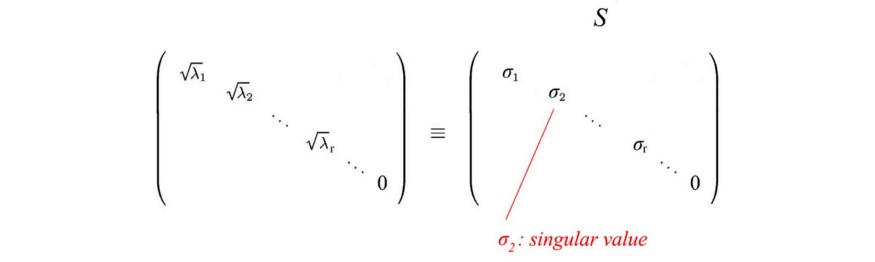

Here $\Sigma$ is a diagonal matrix, which consists of the singular values of $A$, which is equal to the square root of the eigenvalues of $A^T.A$ and $A.A^T$.

To standardize our solution, we order the singular values of $A$ to be placed in the $\Sigma$ matrix in descending order.


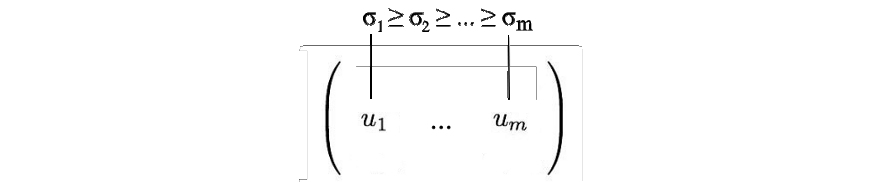


In [ ]:
sigval = np.sort(np.sqrt(yeigval))[::-1]          # returns the array of singular values in descending order to 'sigval'
sigma = np.zeros((9, 5))          # creates a matrix of order (9, 5) with all zero values.
np.fill_diagonal(sigma, sigval)         # fills the diagonal elements of the matrix 'sigma' with the array of singular values 'sigval'
print("The Shape of Sigma Matrix: ",end=' ')
print(sigma.shape)            # returns the shape of the matrix
print("\n")
print("The Sigma Matrix is:--\n")
print(sigma)

The Shape of Sigma Matrix:  (9, 5)


The Sigma Matrix is:--

[[72.67225054  0.          0.          0.          0.        ]
 [ 0.         39.86546929  0.          0.          0.        ]
 [ 0.          0.         11.54290425  0.          0.        ]
 [ 0.          0.          0.          2.41710461  0.        ]
 [ 0.          0.          0.          0.          0.2175474 ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


## Reconstruction of original matrix:--

This can be done through the matrix multiplication of our calculated matrices $U$, $V$ and $\Sigma$.
\begin{align}A = U \Sigma V^T\end{align}



In [ ]:
Vt = np.transpose(V)
temp = (U @ sigma) @ Vt         # '@' used for the matrix multiplication of two or more matrices
print(temp)

[[ -7.36039037 -14.21710368 -16.00320286  13.22681692  23.78754777]
 [ -4.97514643 -14.6497557  -12.81763554  13.39356841  17.89282315]
 [  2.40795875 -15.41879398 -12.45580646  13.10580645  15.08486823]
 [ 11.26955108 -15.50493609 -13.01831911   8.16907908   8.27186132]
 [ 14.88386755 -16.12664716 -14.14614143   6.55219726   7.65226318]
 [ 19.26904895 -12.31556637 -14.55686128   1.60043798   7.05457056]
 [ 19.44042718  -9.77552535 -15.71578938  -3.17584734   6.65107908]
 [ 19.97174869  -6.87683009 -14.14193237  -3.53389194   7.49371861]
 [ 12.93163942  -3.89782604 -10.05478592  -4.63784281   4.26278645]]


Yet, it is not equal to our original matrix, but after some of the row/column reduction methods, we may get the same original matrix.